# MNIST

This notebook shows how to use the function `pymde.preserve_neighbors` to produce embeddings that highlight the local structure of your data, using MNIST as a case study. In these embeddings similar digits are near each other, and dissimilar digits are not near each other.

It also shows how to debug embeddings and search for outliers in your original data, using PyMDE.

In [1]:
import pymde

In [2]:
mnist = pymde.datasets.MNIST()

## Embeddings, in one line

Feb 03 04:00:51 PM: Constructing kNN graph (k=15)
Wed Feb  3 16:00:59 2021 Building RP forest with 21 trees
Wed Feb  3 16:01:02 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Feb 03 04:01:15 PM: Computing quadratic initialization.
Feb 03 04:01:23 PM: Fitting a centered embedding into R^2, for a graph with 70000 items and 1552479 edges.
Feb 03 04:01:23 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Feb 03 04:01:24 PM: iteration 000 | distortion 0.274861 | residual norm 0.00434475 | step length 5.505 | percent change 0.00639233
Feb 03 04:01:27 PM: iteration 030 | distortion 0.133952 | residual norm 0.000307181 | step length 1 | percent change 1.23275
Feb 03 04:01:31 PM: iteration 060 | distortion 0.124108 | residual norm 0.000113538 | step length 1 | percent change 0.519051
Feb 03 04:01:34 PM: iteration 090 | distortion 0.122620 | residual norm 5.08111e-05 | step length 1 | perc

<AxesSubplot:>

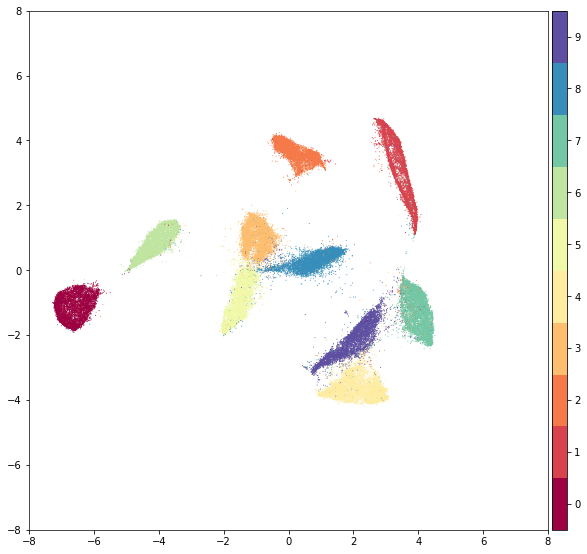

In [3]:
embedding = pymde.preserve_neighbors(mnist.data, verbose=True).embed(verbose=True)
pymde.plot(embedding, color_by=mnist.attributes['digits'])

Feb 03 04:02:12 PM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 1164344 edges.
Feb 03 04:02:12 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Feb 03 04:02:12 PM: iteration 000 | distortion 0.203155 | residual norm 0.00427542 | step length 1 | percent change 0.00114266
Feb 03 04:02:15 PM: iteration 030 | distortion 0.149617 | residual norm 0.000205468 | step length 1 | percent change 0.640804
Feb 03 04:02:17 PM: iteration 060 | distortion 0.146615 | residual norm 0.000153074 | step length 1 | percent change 0.43567
Feb 03 04:02:20 PM: iteration 090 | distortion 0.145159 | residual norm 0.000112265 | step length 1 | percent change 0.623297
Feb 03 04:02:23 PM: iteration 120 | distortion 0.144266 | residual norm 7.08418e-05 | step length 1 | percent change 0.297551
Feb 03 04:02:25 PM: iteration 150 | distortion 0.144043 | residual norm 2.87043e-05 | step length 1 | percent change 0.163951
Feb 03 04:02:28 PM: iteration 180 | distorti

<AxesSubplot:>

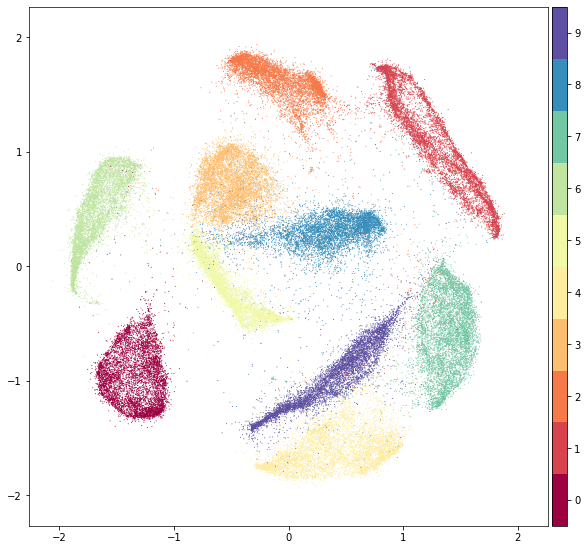

In [4]:
embedding = pymde.preserve_neighbors(mnist.data, constraint=pymde.Standardized()).embed(verbose=True)
pymde.plot(embedding, color_by=mnist.attributes['digits'])

Feb 03 04:02:42 PM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 776346 edges.
Feb 03 04:02:42 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Feb 03 04:02:42 PM: iteration 000 | distortion 0.044436 | residual norm 2.08731e-09 | step length 1.01 | percent change 5.63438e-10
Feb 03 04:02:42 PM: Converged in 001 iterations, with residual norm 2.08731e-09
Feb 03 04:02:42 PM: Finished fitting in 0.148 seconds and 1 iterations.
Feb 03 04:02:42 PM: average distortion 0.0444 | residual norm 2.1e-09


<AxesSubplot:>

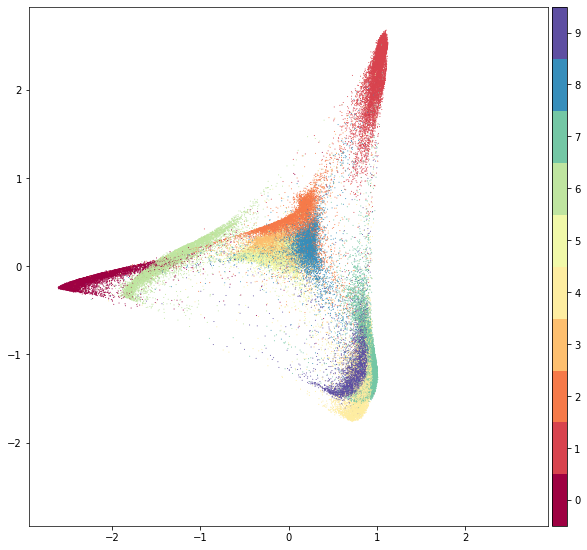

In [5]:
embedding = pymde.preserve_neighbors(mnist.data,
    attractive_penalty=pymde.penalties.Quadratic,
    repulsive_penalty=None,
).embed(verbose=True)
pymde.plot(embedding, color_by=mnist.attributes['digits'])

## Embeddings, from scratch

In [6]:
knn_graph = pymde.preprocess.data_matrix.k_nearest_neighbors(mnist.data, k=15, verbose=True)

Wed Feb  3 16:02:42 2021 Building RP forest with 21 trees
Wed Feb  3 16:02:45 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations


### Quadratic MDE problems

The `embed` method computes and returns an embedding.

The embedding is also accessible via the `X` attribute of the `MDE` instance.

In [7]:
quadratic_mde = pymde.MDE(
    n_items=mnist.data.shape[0],
    embedding_dim=2,
    edges=knn_graph.edges,
    distortion_function=pymde.penalties.Quadratic(knn_graph.weights),
    constraint=pymde.Standardized())

quadratic_mde.embed(verbose=True)

Feb 03 04:02:48 PM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 776289 edges.
Feb 03 04:02:48 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Feb 03 04:02:48 PM: iteration 000 | distortion 5.411558 | residual norm 0.0115335 | step length 5335.22 | percent change 16.4456
Feb 03 04:02:49 PM: iteration 030 | distortion 0.078210 | residual norm 0.00035467 | step length 1 | percent change 4.61895
Feb 03 04:02:50 PM: iteration 060 | distortion 0.056082 | residual norm 0.000182409 | step length 1 | percent change 6.91585
Feb 03 04:02:51 PM: iteration 090 | distortion 0.047494 | residual norm 0.000137029 | step length 1 | percent change 3.88623
Feb 03 04:02:52 PM: iteration 120 | distortion 0.045390 | residual norm 4.2628e-05 | step length 1 | percent change 1.04698
Feb 03 04:02:53 PM: iteration 150 | distortion 0.044919 | residual norm 2.57391e-05 | step length 0.447361 | percent change 0.741431
Feb 03 04:02:54 PM: Converged in 167 iter

tensor([[-0.1981, -0.0831],
        [-2.1052,  1.0339],
        [ 1.3495,  1.2491],
        ...,
        [ 1.3099,  0.6578],
        [-0.0549, -0.1663],
        [-1.3322,  0.4846]])

After embedding, we can call the `plot` method to visualize the embedding (when `embedding_dim` $\leq 3$).

The `color_by` keyword argument takes a length-$n$ list of attribute values associated with the items; the values are used to color the points, with each unique value getting its own color. 

Here, the attribute is the digit depicted by the image.

<AxesSubplot:>

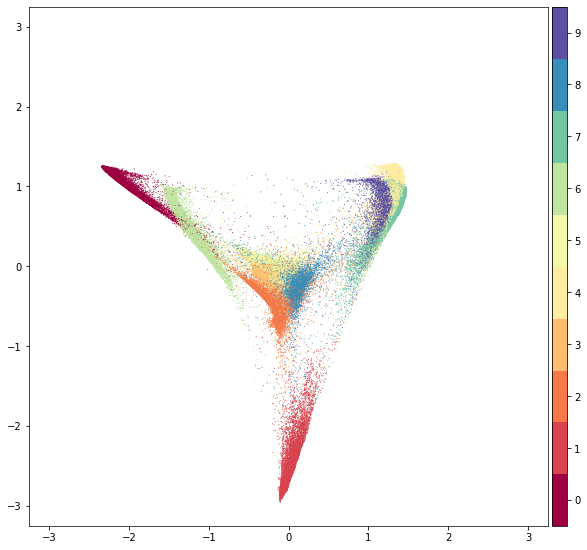

In [8]:
quadratic_mde.plot(color_by=mnist.attributes['digits'])

Next, we fit an embedding with 3 dimensions. We can visualize 3D embeddings with `PyMDE`.

Feb 03 04:02:54 PM: Fitting a standardized embedding into R^3, for a graph with 70000 items and 776289 edges.
Feb 03 04:02:54 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Feb 03 04:02:55 PM: iteration 000 | distortion 8.125079 | residual norm 0.0141304 | step length 6129.06 | percent change 18.899
Feb 03 04:02:56 PM: iteration 030 | distortion 0.125756 | residual norm 0.000503219 | step length 1 | percent change 5.34269
Feb 03 04:02:57 PM: iteration 060 | distortion 0.088970 | residual norm 0.000149357 | step length 1 | percent change 1.72826
Feb 03 04:02:59 PM: iteration 090 | distortion 0.084741 | residual norm 0.000104384 | step length 1 | percent change 0.789927
Feb 03 04:03:00 PM: iteration 120 | distortion 0.076378 | residual norm 0.000163673 | step length 1 | percent change 0.862759
Feb 03 04:03:02 PM: iteration 150 | distortion 0.075475 | residual norm 5.36614e-05 | step length 1 | percent change 0.0727256
Feb 03 04:03:02 PM: Converged in 168 iterati

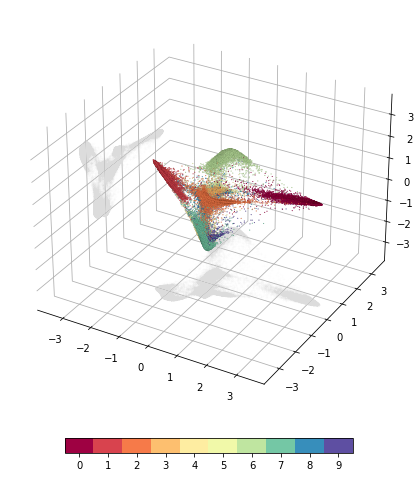

In [9]:
quadratic_mde_3d = pymde.MDE(
    n_items=mnist.data.shape[0],
    embedding_dim=3,
    edges=knn_graph.edges,
    distortion_function=pymde.penalties.Quadratic(knn_graph.weights),
    constraint=pymde.Standardized())

quadratic_mde_3d.embed(verbose=True)
quadratic_mde_3d.plot(color_by=mnist.attributes['digits'])

## Debugging the embedding

### The distribution of distortions

We can visualize the cumulative distribution of distortions. We see that a small number of pairs are responsible for most of the embedding's distortion.

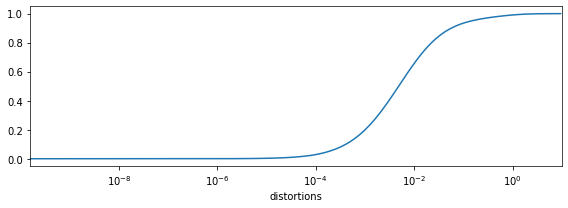

In [10]:
quadratic_mde.distortions_cdf()

### High distortion pairs

It can be instructive to inspect the pairs with highest distortion. A pair, here one column of the grid, is a set of two images that our MDE problem was told are similar. In this case, some of the high-distortion pairs are oddly drawn digits, and don't appear very similar to each other.

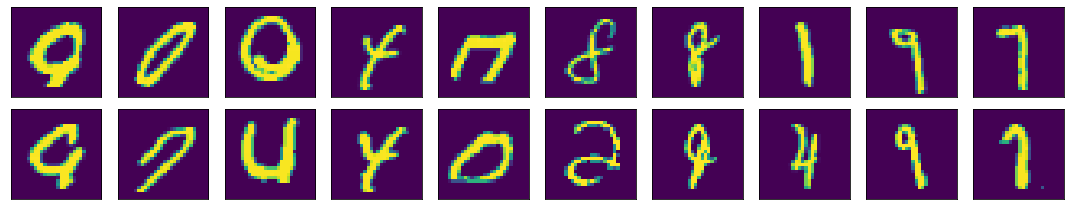

In [11]:
import matplotlib.pyplot as plt

pairs, distortions = quadratic_mde.high_distortion_pairs()
outliers = pairs[:10]

def plot_pairs(pairs):
    fig, axs = plt.subplots(2, pairs.shape[0], figsize=(15.0, 3.))
    for pair_index in range(pairs.shape[0]):
        i = pairs[pair_index][0]
        j = pairs[pair_index][1]
        im_i = mnist.data[i].reshape(28, 28)
        im_j = mnist.data[j].reshape(28, 28)
        axs[0][pair_index].imshow(im_i)
        axs[0][pair_index].set_xticks([])
        axs[0][pair_index].set_yticks([])
        axs[1][pair_index].imshow(im_j)
        axs[1][pair_index].set_xticks([])
        axs[1][pair_index].set_yticks([])
    plt.tight_layout()
    
plot_pairs(outliers)

## Low distortion pairs

In comparison, the pairs with the lowest distortion look like very reasonable pairs of images.

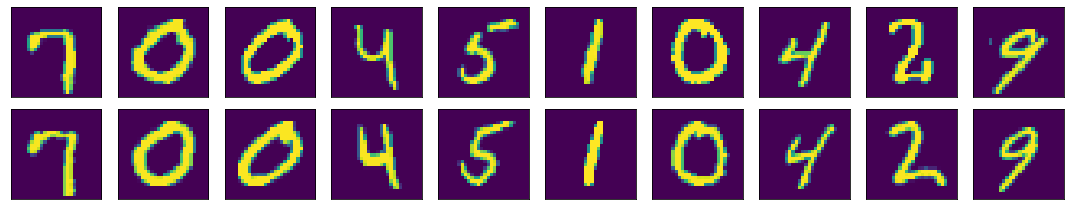

In [12]:
import matplotlib.pyplot as plt

low_distortion_pairs = pairs[-10:]
plot_pairs(low_distortion_pairs)

## Including dissimilar pairs

The quadratic MDE problem used a standardization constraint to enforce the embedding to spread out, and only used pairs of similar items.

Instead of only relying on the constraint, we can also design the distortion functions so that they discourage dissimilar items from being close. We do this by including some pairs of dissimilar items, in addition to the pairs of similar items.

### Form $\mathcal{E} = \mathcal{E}_\text{sim} \cup \mathcal{E}_\text{dis}$

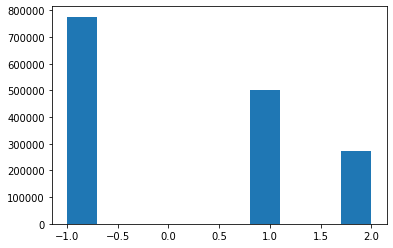

In [14]:
import torch


similar_edges = knn_graph.edges

dissimilar_edges = pymde.preprocess.dissimilar_edges(
    n_items=mnist.data.shape[0], num_edges=similar_edges.shape[0], similar_edges=similar_edges)

edges = torch.cat([similar_edges, dissimilar_edges])
weights = torch.cat([knn_graph.weights, -1.*torch.ones(dissimilar_edges.shape[0])])

plt.hist(weights.numpy())
plt.show()

### Define the distortion function $f$

In [15]:
from functools import partial


f = pymde.penalties.PushAndPull(
    weights=weights,
    attractive_penalty=pymde.penalties.Log1p,
    repulsive_penalty=pymde.penalties.Log,
)

### A standardized embedding ...

Feb 03 04:05:04 PM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 1552338 edges.
Feb 03 04:05:04 PM: `embed` method parameters: eps=1.0e-05, max_iter=400, memory_size=10
Feb 03 04:05:05 PM: iteration 000 | distortion 0.275139 | residual norm 0.00570811 | step length 1 | percent change 0.00152556
Feb 03 04:05:09 PM: iteration 040 | distortion 0.188116 | residual norm 0.000124347 | step length 1 | percent change 0.888526
Feb 03 04:05:14 PM: iteration 080 | distortion 0.186212 | residual norm 5.02731e-05 | step length 1 | percent change 0.590904
Feb 03 04:05:19 PM: iteration 120 | distortion 0.185555 | residual norm 5.88952e-05 | step length 1 | percent change 0.18652
Feb 03 04:05:23 PM: iteration 160 | distortion 0.185000 | residual norm 4.80047e-05 | step length 1 | percent change 1.02001
Feb 03 04:05:28 PM: iteration 200 | distortion 0.184448 | residual norm 1.88186e-05 | step length 1 | percent change 0.317972
Feb 03 04:05:31 PM: Converged in 226 iteratio

<AxesSubplot:>

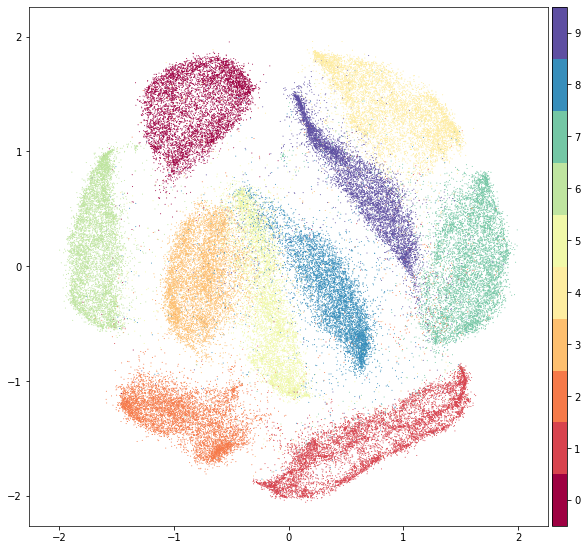

In [16]:
std_mde = pymde.MDE(
    n_items=mnist.data.shape[0],
    embedding_dim=2,
    edges=edges,
    distortion_function=f,
    constraint=pymde.Standardized(),
)
std_mde.embed(X=quadratic_mde.X, max_iter=400, verbose=True)
std_mde.plot(color_by=mnist.attributes['digits'])

## ... and an unconstrained embedding

Feb 03 04:05:32 PM: Fitting a centered embedding into R^2, for a graph with 70000 items and 1552338 edges.
Feb 03 04:05:32 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Feb 03 04:05:32 PM: iteration 000 | distortion 0.275139 | residual norm 0.00573031 | step length 1 | percent change 0.00153149
Feb 03 04:05:35 PM: iteration 030 | distortion 0.136867 | residual norm 0.000328706 | step length 1 | percent change 1.74014
Feb 03 04:05:39 PM: iteration 060 | distortion 0.125399 | residual norm 0.000115279 | step length 1 | percent change 0.509321
Feb 03 04:05:42 PM: iteration 090 | distortion 0.123086 | residual norm 9.13861e-05 | step length 1 | percent change 0.344928
Feb 03 04:05:45 PM: iteration 120 | distortion 0.122457 | residual norm 4.73651e-05 | step length 1 | percent change 0.282709
Feb 03 04:05:49 PM: iteration 150 | distortion 0.122021 | residual norm 4.01301e-05 | step length 1 | percent change 0.307884
Feb 03 04:05:52 PM: iteration 180 | distortion 0

<AxesSubplot:>

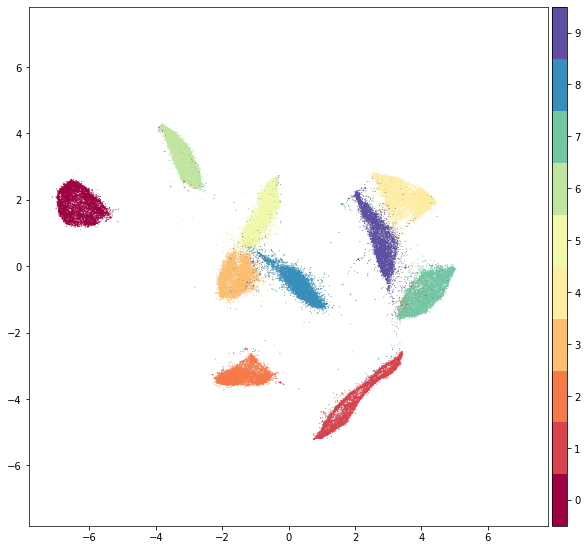

In [17]:
unconstrained_mde = pymde.MDE(
    n_items=mnist.data.shape[0],
    embedding_dim=2,
    edges=edges,
    distortion_function=f,
)
unconstrained_mde.embed(X=quadratic_mde.X, verbose=True)
unconstrained_mde.plot(color_by=mnist.attributes['digits'])